In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier  
from sklearn.linear_model import LassoCV 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

sns.set()

In [2]:
df=pd.read_feather('C:/Users/DELL Latitude E5450/Documents/Python Scripts/Github/CO2/feather.csv')
df.tail()

,Country,Mk,Cn,r,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),IT,year,Fuel consumption
31276608,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,e13 22,2020,NaN
31276609,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,None,2020,NaN
31276610,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,e13 22,2020,NaN
31276611,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,None,2020,NaN
31276612,GB,SUBARU,BRZ SE LUX LTD,1,1311.0,NaN,191.0,PETROL,None,NaN,NaN,None,2020,NaN


In [28]:
df.describe()

,r,m (kg),Mt,Ewltp (g/km),ec (cm3),ep (KW),year,Fuel consumption
count,3.127661e+07,3.127649e+07,3.059846e+07,3.127661e+07,3.015073e+07,2.744748e+07,3.127661e+07,0.0
mean,1.000002e+00,1.428795e+03,1.564566e+03,1.410690e+02,1.541023e+03,1.003791e+02,2.019229e+03,NaN
std,5.385100e-03,3.004705e+02,3.224368e+02,4.220814e+01,5.024976e+02,4.642369e+01,6.845479e-01,NaN
min,1.000000e+00,2.050000e+02,1.350000e+02,0.000000e+00,6.000000e+02,2.000000e+00,2.018000e+03,NaN
25%,1.000000e+00,1.201000e+03,1.328000e+03,1.280000e+02,1.199000e+03,7.200000e+01,2.019000e+03,NaN
50%,1.000000e+00,1.391000e+03,1.520000e+03,1.410000e+02,1.498000e+03,9.000000e+01,2.019000e+03,NaN
75%,1.000000e+00,1.598000e+03,1.739000e+03,1.600000e+02,1.968000e+03,1.100000e+02,2.020000e+03,NaN
max,2.200000e+01,4.245000e+03,6.542000e+03,2.810000e+03,7.993000e+03,1.177000e+03,2.020000e+03,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31276613 entries, 0 to 31276612
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Mk                 object 
 2   Cn                 object 
 3   r                  int64  
 4   m (kg)             float64
 5   Mt                 float64
 6   Ewltp (g/km)       float64
 7   Ft                 object 
 8   Fm                 object 
 9   ec (cm3)           float64
 10  ep (KW)            float64
 11  IT                 object 
 12  year               int64  
 13  Fuel consumption   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 3.3+ GB


In [ ]:
codecs = ['ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
          'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
          'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
          'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
          'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
          'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
          'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
          'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']

for encoding in codecs:
    worked=True
    try:
        df=pd.read_feather('C:/Users/DELL Latitude E5450/Documents/Python Scripts/Github/CO2/feather.csv')
    except:
        worked=False
    if worked:
        print(encoding, ':\n', df.head())

In [ ]:
df=pd.read_feather('C:/Users/DELL Latitude E5450/Documents/Python Scripts/Github/CO2/feather.csv', encoding="iso8859_11",sep=";")
df.tail()

In [5]:
df.describe(include = object)

,Country,Mk,Cn,Ft,Fm,IT
count,31275690,31253997,31242430,31263686,31276594,9122035
unique,30,311,15478,11,7,363
top,DE,RENAULT,CLIO,PETROL,M,E2 17
freq,7406525,2132784,698745,19128294,26933945,1215116


In [6]:
data_cat_features = df.select_dtypes(include='object')
data_cat_features1 = data_cat_features[[ 'Mk', 'Cn', 'Ft','Fm','IT']]

In [7]:
df['r'].value_counts()

1     31276602
2            6
4            2
20           1
22           1
10           1
Name: r, dtype: int64

In [8]:
df['IT'].value_counts()

E2 17          1215116
E9 17           426374
E2 17 19        398824
e24 17 19       378590
e3 17           295272
                ...   
E24 3 19             1
E 13 19              1
E8 17 28 29          1
e1-08                1
E1319                1
Name: IT, Length: 363, dtype: int64

In [30]:
df['year'].value_counts()

2019    14986852
2020    11718599
2018     4571162
Name: year, dtype: int64

In [9]:
df['Fuel consumption '].value_counts()

Series([], Name: Fuel consumption , dtype: int64)

In [10]:
print(df.Fm.value_counts(normalize=True))

M    0.861153
H    0.063833
E    0.035365
P    0.026369
B    0.012865
F    0.000268
b    0.000147
Name: Fm, dtype: float64


In [3]:
to_drop=['r','IT','Fuel consumption ']
cdf=df.drop(to_drop,axis=1)
cdf.head

<bound method NDFrame.head of          Country       Mk                            Cn  m (kg)      Mt  \
0             BE  RENAULT                        TWINGO   970.0  1104.0   
1             BE  RENAULT                        TWINGO   970.0  1082.0   
2             BE     OPEL                   CROSSLAND X  1254.0  1425.0   
3             BE     OPEL                   CROSSLAND X  1254.0  1426.0   
4             BE     OPEL                   CROSSLAND X  1254.0  1425.0   
...          ...      ...                           ...     ...     ...   
31276608      GB   SUBARU  XV I SE PREM E BOXER AWD CVT  1628.0  1735.0   
31276609      GB   SUBARU   OUTBACK SE PREM SYM AWD CVT  1696.0  1795.0   
31276610      GB   SUBARU  XV I SE PREM E BOXER AWD CVT  1628.0  1735.0   
31276611      GB   SUBARU   OUTBACK SE PREM SYM AWD CVT  1696.0  1795.0   
31276612      GB   SUBARU                BRZ SE LUX LTD  1311.0     NaN   

          Ewltp (g/km)      Ft    Fm  ec (cm3)  ep (KW)  year  
0    

In [4]:
to_rename = {
    'ec (cm3)':'Engine_Size',
    'm (kg)' : 'Mass_kg',
    'Ewltp (g/km)':'CO2_Emission',
    'Fm':'Gear',
    'Cn' : 'Model',
    'Mt' : 'Curb_Weight_kg',
    'Ft' : "Fuel_Type",
    'ep (KW)' : 'ep_KW'
}
cdf=cdf.rename(to_rename,axis=1)
cdf.tail()

,Country,Mk,Model,Mass_kg,Curb_Weight_kg,CO2_Emission,Fuel_Type,Gear,Engine_Size,ep_KW,year
31276608,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,2020
31276609,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020
31276610,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,2020
31276611,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020
31276612,GB,SUBARU,BRZ SE LUX LTD,1311.0,NaN,191.0,PETROL,None,NaN,NaN,2020


In [29]:
cdf.describe()

,Mass_kg,Curb_Weight_kg,CO2_Emission,Engine_Size,ep_KW,year
count,3.013777e+07,2.960266e+07,3.013784e+07,3.013784e+07,2.658874e+07,3.013784e+07
mean,1.418489e+03,1.556472e+03,1.462591e+02,1.541126e+03,1.001906e+02,2.019216e+03
std,2.936946e+02,3.178291e+02,3.300482e+01,5.025393e+02,4.536655e+01,6.828296e-01
min,2.050000e+02,1.350000e+02,0.000000e+00,6.000000e+02,2.000000e+00,2.018000e+03
25%,1.191000e+03,1.321000e+03,1.300000e+02,1.199000e+03,7.200000e+01,2.019000e+03
50%,1.385000e+03,1.514000e+03,1.420000e+02,1.498000e+03,9.000000e+01,2.019000e+03
75%,1.585000e+03,1.731000e+03,1.600000e+02,1.968000e+03,1.100000e+02,2.020000e+03
max,4.245000e+03,6.542000e+03,2.810000e+03,7.993000e+03,1.177000e+03,2.020000e+03


In [13]:
cdf['Gear'].value_counts()

M    26933945
H     1996493
E     1106103
P      824725
B      402362
F        8370
b        4596
Name: Gear, dtype: int64

In [7]:
cdf.isna().sum()

Country               923
Mk                  22616
Model               34183
Mass_kg               126
Curb_Weight_kg     678157
CO2_Emission            0
Fuel_Type           12927
Gear                   19
Engine_Size       1125880
ep_KW             3829130
year                    0
dtype: int64

In [5]:
cdf=cdf.dropna(subset=['Fuel_Type','Engine_Size'], axis=0)

In [6]:
rdf=cdf.copy()
rdf.tail()

,Country,Mk,Model,Mass_kg,Curb_Weight_kg,CO2_Emission,Fuel_Type,Gear,Engine_Size,ep_KW,year
31276607,GB,SUBARU,FORESTER I XE PREM SYM AWD CVT,1600.0,1725.0,199.0,PETROL,M,1995.0,110.0,2020
31276608,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,2020
31276609,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020
31276610,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,2020
31276611,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020


In [27]:
rdf.describe()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
count,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000,128908.000000
mean,1715.488333,172.523544,0.873569,1941.043690,111.226347,0.000396,0.493716,0.001885,0.000597,0.000047,0.008556,0.002389,0.002987,0.459948,0.029478
std,358.557652,46.048263,0.332336,688.966781,83.504934,0.019887,0.499962,0.043377,0.024433,0.006822,0.092105,0.048822,0.054569,0.498395,0.169144
min,205.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1455.000000,144.000000,1.000000,1499.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1683.000000,166.000000,1.000000,1968.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1949.000000,197.000000,1.000000,1997.000000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4245.000000,2810.000000,1.000000,7993.000000,1177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
rdf['Fuel_Type'].value_counts()

PETROL             19115257
DIESEL              9625568
PETROL/ELECTRIC      809850
LPG                  392863
NG                    98728
DIESEL/ELECTRIC       56249
NG-BIOMETHANE         29499
E85                    7337
CNG                    2475
ELECTRIC                 13
Name: Fuel_Type, dtype: int64

In [7]:
rdf=rdf.drop_duplicates()

In [8]:
rdf.tail()

,Country,Mk,Model,Mass_kg,Curb_Weight_kg,CO2_Emission,Fuel_Type,Gear,Engine_Size,ep_KW,year
31275881,GB,SUBARU,XV I SE SYMMETRICAL AWD CVT,1500.0,1609.0,180.0,PETROL,M,1600.0,84.0,2020
31275896,GB,SUBARU,FORESTER I XE SYMM-CAL AWD CVT,1600.0,1725.0,199.0,PETROL,M,1995.0,110.0,2020
31275974,GB,SUBARU,OUTBACK SE SYMMETRICAL AWD CVT,1668.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020
31276088,GB,SUBARU,BRZ SE LUX LTD,1311.0,1414.0,191.0,PETROL,M,1998.0,147.0,2020
31276578,GB,SUBARU,BRZ SE LUX,1311.0,1414.0,191.0,PETROL,M,1998.0,147.0,2020


In [20]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725723 entries, 0 to 31276578
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country         object 
 1   Mk              object 
 2   Model           object 
 3   Mass_kg         float64
 4   Curb_Weight_kg  float64
 5   CO2_Emission    float64
 6   Fuel_Type       object 
 7   Gear            object 
 8   Engine_Size     float64
 9   ep (KW)         float64
 10  year            int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 341.1+ MB


In [8]:
rdf.loc[rdf['Gear'].ne('M'), 'Gear'] = 'A'
rdf.tail()

,Country,Mk,Model,Mass_kg,Curb_Weight_kg,CO2_Emission,Fuel_Type,Gear,Engine_Size,ep_KW,year
31275881,GB,SUBARU,XV I SE SYMMETRICAL AWD CVT,1500.0,1609.0,180.0,PETROL,M,1600.0,84.0,2020
31275896,GB,SUBARU,FORESTER I XE SYMM-CAL AWD CVT,1600.0,1725.0,199.0,PETROL,M,1995.0,110.0,2020
31275974,GB,SUBARU,OUTBACK SE SYMMETRICAL AWD CVT,1668.0,1795.0,193.0,PETROL,M,2498.0,129.0,2020
31276088,GB,SUBARU,BRZ SE LUX LTD,1311.0,1414.0,191.0,PETROL,M,1998.0,147.0,2020
31276578,GB,SUBARU,BRZ SE LUX,1311.0,1414.0,191.0,PETROL,M,1998.0,147.0,2020


In [9]:
rdf['Gear'].value_counts()

M    3343659
A     382064
Name: Gear, dtype: int64

In [10]:
rdf['Gear']=rdf['Gear'].replace(({'M':1,'A':0}))

In [14]:
rdf.isna().sum()

Country               97
Mk                  1732
Model               4369
Mass_kg               39
Curb_Weight_kg     34651
CO2_Emission           0
Fuel_Type              0
Gear                   0
Engine_Size            0
ep_KW             204822
year                   0
dtype: int64

In [11]:
to_drop=['Country','Mk','Model','Curb_Weight_kg','year']
rdf=rdf.drop(to_drop,axis=1)
rdf.tail()

,Mass_kg,CO2_Emission,Fuel_Type,Gear,Engine_Size,ep_KW
31275881,1500.0,180.0,PETROL,1,1600.0,84.0
31275896,1600.0,199.0,PETROL,1,1995.0,110.0
31275974,1668.0,193.0,PETROL,1,2498.0,129.0
31276088,1311.0,191.0,PETROL,1,1998.0,147.0
31276578,1311.0,191.0,PETROL,1,1998.0,147.0


In [13]:
rdf.isna().sum()

Mass_kg             39
CO2_Emission         0
Fuel_Type            0
Gear                 0
Engine_Size          0
ep_KW           204822
dtype: int64

In [12]:
rdf=rdf.dropna(subset=['Mass_kg'], axis=0)

In [13]:
rdf= rdf.fillna(0)

In [13]:
rdf.isna().sum()

Mass_kg         0
CO2_Emission    0
Fuel_Type       0
Gear            0
Engine_Size     0
ep_KW           0
dtype: int64

In [14]:
rdf=pd.get_dummies(rdf,prefix=['FT'],columns=['Fuel_Type'])
rdf.tail()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
31275881,1500.0,180.0,1,1600.0,84.0,0,0,0,0,0,0,0,0,1,0
31275896,1600.0,199.0,1,1995.0,110.0,0,0,0,0,0,0,0,0,1,0
31275974,1668.0,193.0,1,2498.0,129.0,0,0,0,0,0,0,0,0,1,0
31276088,1311.0,191.0,1,1998.0,147.0,0,0,0,0,0,0,0,0,1,0
31276578,1311.0,191.0,1,1998.0,147.0,0,0,0,0,0,0,0,0,1,0


In [15]:
rdf=rdf.drop_duplicates()

In [21]:
rdf.tail()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
31274580,1382.0,148.0,1,1353.0,103.0,0,0,0,0,0,0,0,0,1,0
31274716,950.0,240.0,1,1984.0,220.0,0,0,0,0,0,0,0,0,1,0
31275071,1592.0,181.0,1,1597.0,85.0,0,1,0,0,0,0,0,0,0,0
31275268,1484.0,169.0,1,1597.0,85.0,0,1,0,0,0,0,0,0,0,0
31275730,1623.0,196.0,1,1995.0,110.0,0,0,0,0,0,0,0,0,1,0


In [33]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128908 entries, 0 to 31275730
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Mass_kg             128908 non-null  float64
 1   CO2_Emission        128908 non-null  float64
 2   Gear                128908 non-null  int64  
 3   Engine_Size         128908 non-null  float64
 4   ep (KW)             128908 non-null  float64
 5   FT_CNG              128908 non-null  uint8  
 6   FT_DIESEL           128908 non-null  uint8  
 7   FT_DIESEL/ELECTRIC  128908 non-null  uint8  
 8   FT_E85              128908 non-null  uint8  
 9   FT_ELECTRIC         128908 non-null  uint8  
 10  FT_LPG              128908 non-null  uint8  
 11  FT_NG               128908 non-null  uint8  
 12  FT_NG-BIOMETHANE    128908 non-null  uint8  
 13  FT_PETROL           128908 non-null  uint8  
 14  FT_PETROL/ELECTRIC  128908 non-null  uint8  
dtypes: float64(4), int64(1), uint8(1

In [34]:
rdf.corr()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep (KW),FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
Mass_kg,1.000000,0.567843,-0.151340,0.622318,0.341070,-0.007017,0.355442,0.045467,-0.016004,-0.003136,-0.099937,-0.039826,-0.044313,-0.401113,0.203094
CO2_Emission,0.567843,1.000000,0.168619,0.611981,0.389004,-0.021091,0.087822,-0.084314,0.000977,-0.025561,-0.027235,-0.046453,-0.040299,0.054660,-0.354416
Gear,-0.151340,0.168619,1.000000,-0.095215,-0.124900,0.007568,0.134303,-0.101318,-0.064262,-0.000826,-0.166390,-0.000506,-0.118629,0.030641,-0.323834
Engine_Size,0.622318,0.611981,-0.095215,1.000000,0.566512,-0.002612,0.114584,0.002607,-0.008504,-0.003947,-0.065341,-0.038637,-0.044438,-0.108002,0.041640
ep (KW),0.341070,0.389004,-0.124900,0.566512,1.000000,0.001385,-0.087861,0.010229,0.005519,0.000376,-0.030078,-0.015827,-0.012253,0.082265,0.038605
FT_CNG,-0.007017,-0.021091,0.007568,-0.002612,0.001385,1.000000,-0.019646,-0.000865,-0.000486,-0.000136,-0.001848,-0.000974,-0.001089,-0.018360,-0.003467
FT_DIESEL,0.355442,0.087822,0.134303,0.114584,-0.087861,-0.019646,1.000000,-0.042916,-0.024142,-0.006737,-0.091739,-0.048328,-0.054048,-0.911336,-0.172104
FT_DIESEL/ELECTRIC,0.045467,-0.084314,-0.101318,0.002607,0.010229,-0.000865,-0.042916,1.000000,-0.001062,-0.000296,-0.004037,-0.002127,-0.002379,-0.040106,-0.007574
FT_E85,-0.016004,0.000977,-0.064262,-0.008504,0.005519,-0.000486,-0.024142,-0.001062,1.000000,-0.000167,-0.002271,-0.001196,-0.001338,-0.022562,-0.004261
FT_ELECTRIC,-0.003136,-0.025561,-0.000826,-0.003947,0.000376,-0.000136,-0.006737,-0.000296,-0.000167,1.000000,-0.000634,-0.000334,-0.000373,-0.006296,-0.001189


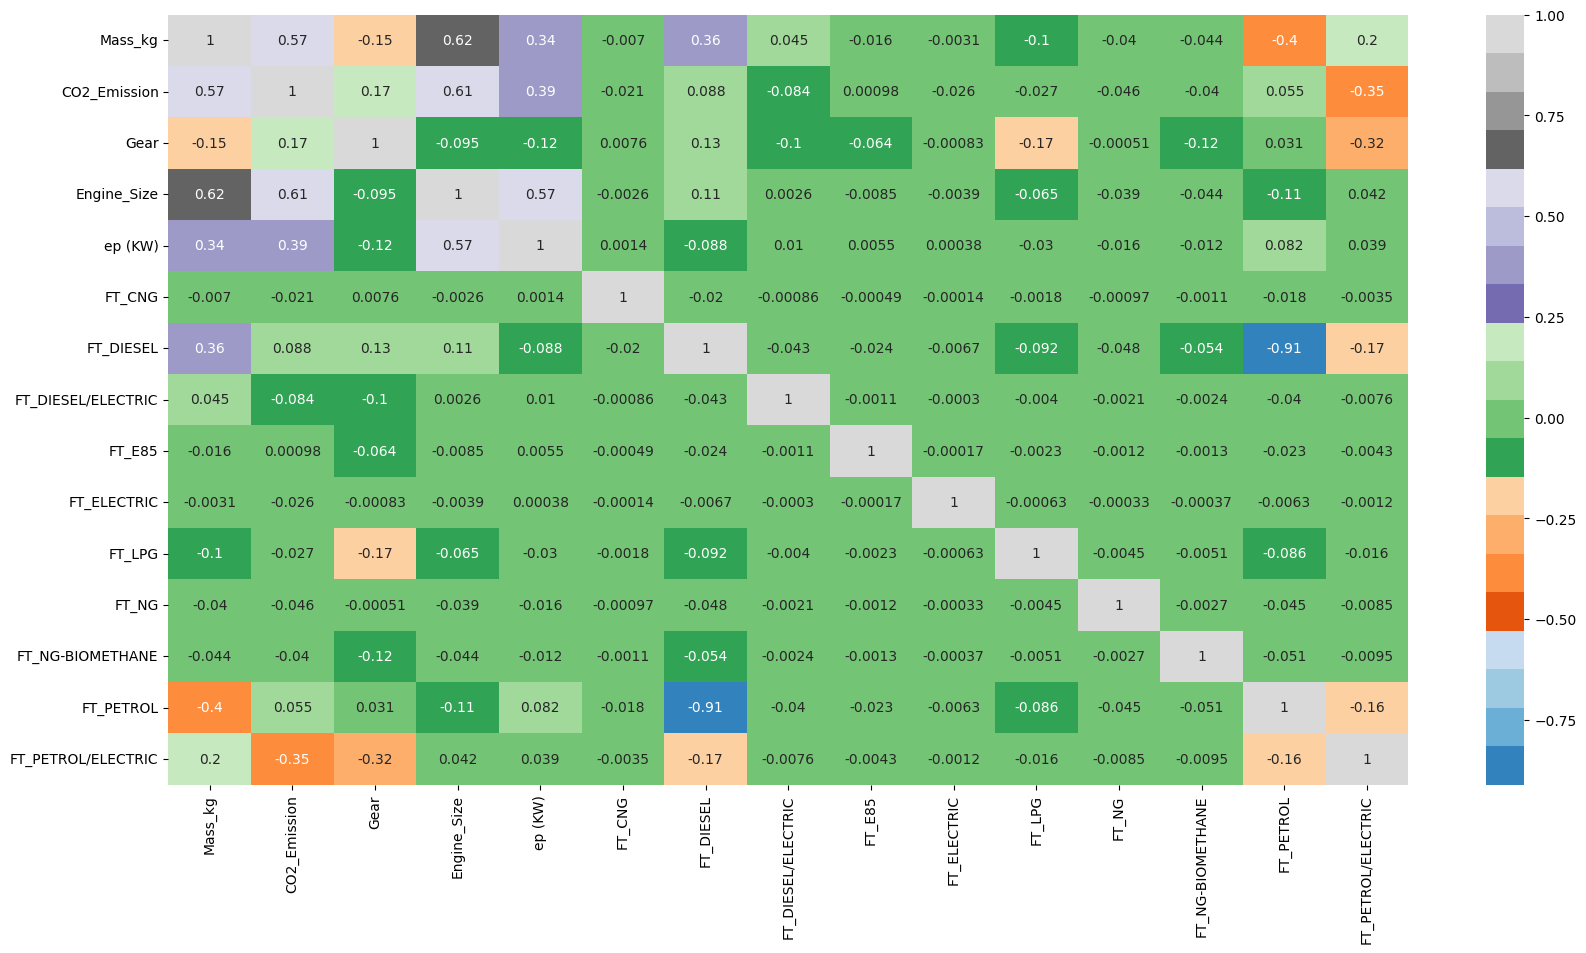

In [36]:
import seaborn as sns

data_num_features = rdf.select_dtypes(include=np.number)

plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

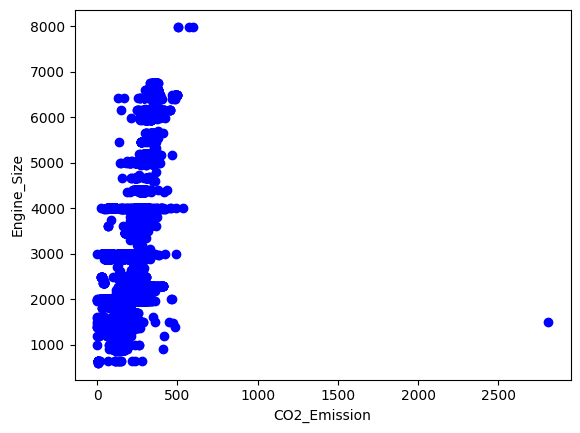

In [22]:
plt.scatter(rdf.CO2_Emission, rdf.Engine_Size,  color='blue')
plt.xlabel('CO2_Emission', fontsize=10)
plt.ylabel('Engine_Size', fontsize=10)
plt.show()

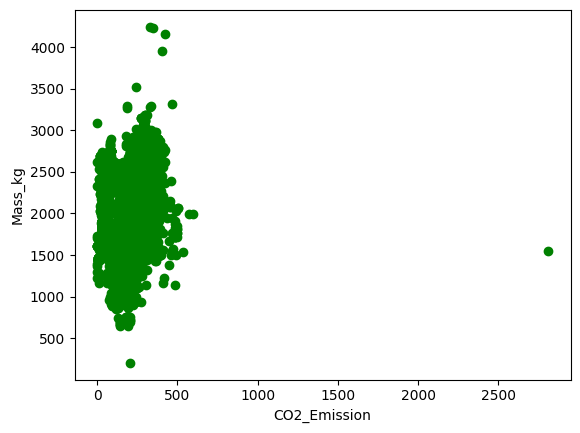

In [23]:
plt.scatter(rdf.CO2_Emission, rdf.Mass_kg,  color='green')
plt.xlabel('CO2_Emission', fontsize=10)
plt.ylabel('Mass_kg', fontsize=10)
plt.show()

In [ ]:
#From the above scatter plot we can see that:

#That the CO2 emissions increase in linear correllation with Engine Size
#Cars with mass of 3 Tonnes and more are not correllated which result in less emissions of CO2

In [39]:
pip install lazypredict

  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
sample_df=rdf.sample(n=120000,random_state=15)
sample_df.tail()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
2178354,1280.0,150.0,1,1200.0,0.0,0,0,0,0,0,0,0,0,1,0
7216459,1637.0,171.0,1,1997.0,130.0,0,1,0,0,0,0,0,0,0,0
4634464,1156.0,130.0,1,999.0,85.0,0,0,0,0,0,0,0,0,1,0
3437106,1825.0,181.0,1,2993.0,195.0,0,1,0,0,0,0,0,0,0,0
3981568,1736.0,190.0,1,1798.0,165.0,0,0,0,0,0,0,0,0,1,0


In [17]:
sample_df.loc[(sample_df['CO2_Emission'] < 800)]

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC
26396091,1743.0,170.0,0,1993.0,135.0,0,0,0,0,0,0,0,0,1,0
12928368,1165.0,113.0,1,898.0,56.0,0,0,0,0,0,0,0,0,1,0
5334037,2127.0,202.0,1,1950.0,140.0,0,1,0,0,0,0,0,0,0,0
4581606,1614.0,145.0,1,1500.0,0.0,0,1,0,0,0,0,0,0,0,0
7379,1986.0,186.0,1,1598.0,89.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178354,1280.0,150.0,1,1200.0,0.0,0,0,0,0,0,0,0,0,1,0
7216459,1637.0,171.0,1,1997.0,130.0,0,1,0,0,0,0,0,0,0,0
4634464,1156.0,130.0,1,999.0,85.0,0,0,0,0,0,0,0,0,1,0
3437106,1825.0,181.0,1,2993.0,195.0,0,1,0,0,0,0,0,0,0,0


In [34]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 26396091 to 3981568
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Mass_kg             120000 non-null  float64
 1   CO2_Emission        120000 non-null  float64
 2   Gear                120000 non-null  int64  
 3   Engine_Size         120000 non-null  float64
 4   ep_KW               120000 non-null  float64
 5   FT_CNG              120000 non-null  uint8  
 6   FT_DIESEL           120000 non-null  uint8  
 7   FT_DIESEL/ELECTRIC  120000 non-null  uint8  
 8   FT_E85              120000 non-null  uint8  
 9   FT_ELECTRIC         120000 non-null  uint8  
 10  FT_LPG              120000 non-null  uint8  
 11  FT_NG               120000 non-null  uint8  
 12  FT_NG-BIOMETHANE    120000 non-null  uint8  
 13  FT_PETROL           120000 non-null  uint8  
 14  FT_PETROL/ELECTRIC  120000 non-null  uint8  
dtypes: float64(4), int64(1), u

In [35]:
# Discovery of Outliers

df_num_features=sample_df.select_dtypes(include=np.number)

In [36]:
#Identifying outliers using IQR

Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Mass_kg               493.0
CO2_Emission           53.0
Gear                    0.0
Engine_Size           498.0
ep_KW                  67.0
FT_CNG                  0.0
FT_DIESEL               1.0
FT_DIESEL/ELECTRIC      0.0
FT_E85                  0.0
FT_ELECTRIC             0.0
FT_LPG                  0.0
FT_NG                   0.0
FT_NG-BIOMETHANE        0.0
FT_PETROL               1.0
FT_PETROL/ELECTRIC      0.0
dtype: float64


In [37]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Mass_kg are 545
Total number of Outliers in column CO2_Emission are 4778
Total number of Outliers in column Gear are 15186
Total number of Outliers in column Engine_Size are 15913
Total number of Outliers in column ep_KW are 8229
Total number of Outliers in column FT_CNG are 48
Total number of Outliers in column FT_DIESEL are 0
Total number of Outliers in column FT_DIESEL/ELECTRIC are 234
Total number of Outliers in column FT_E85 are 71
Total number of Outliers in column FT_ELECTRIC are 6
Total number of Outliers in column FT_LPG are 1025
Total number of Outliers in column FT_NG are 281
Total number of Outliers in column FT_NG-BIOMETHANE are 363
Total number of Outliers in column FT_PETROL are 0
Total number of Outliers in column FT_PETROL/ELECTRIC are 3533


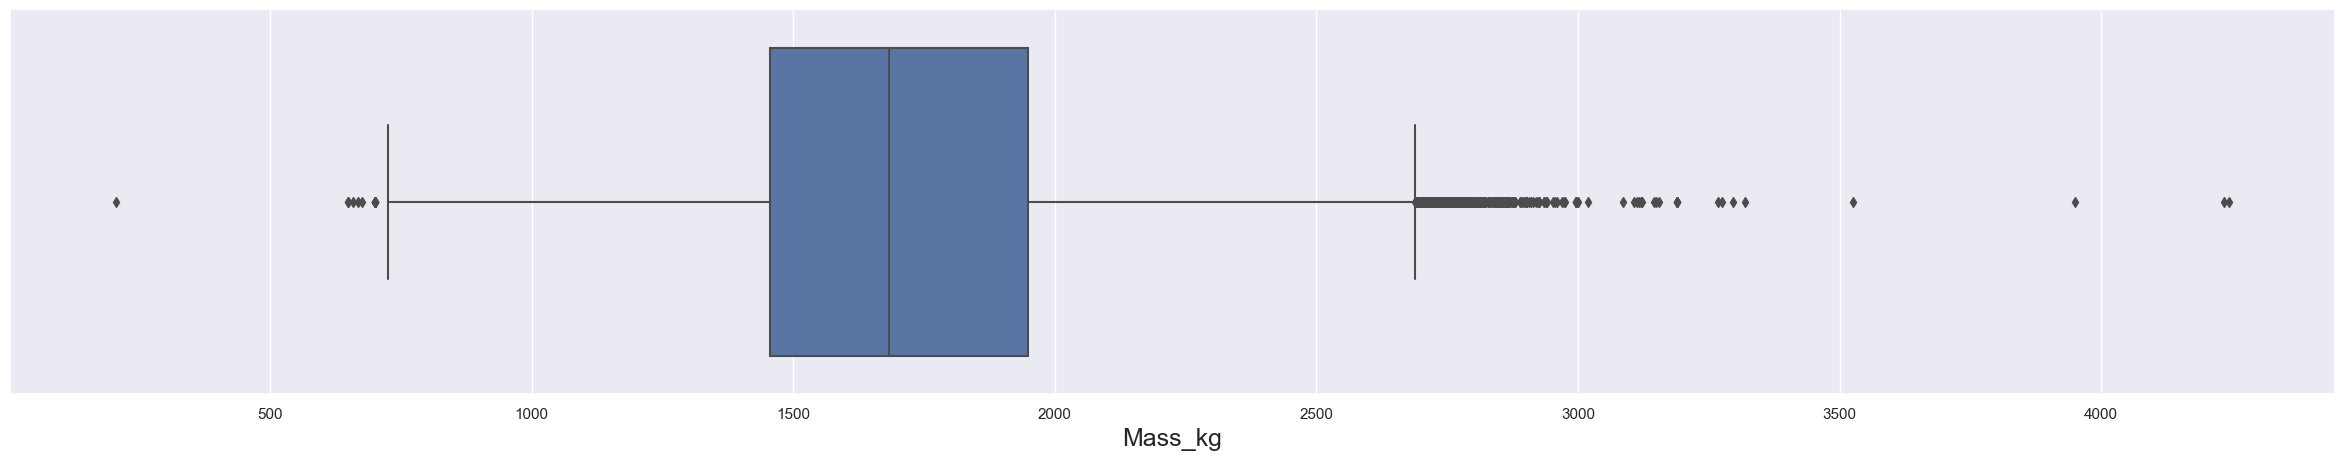

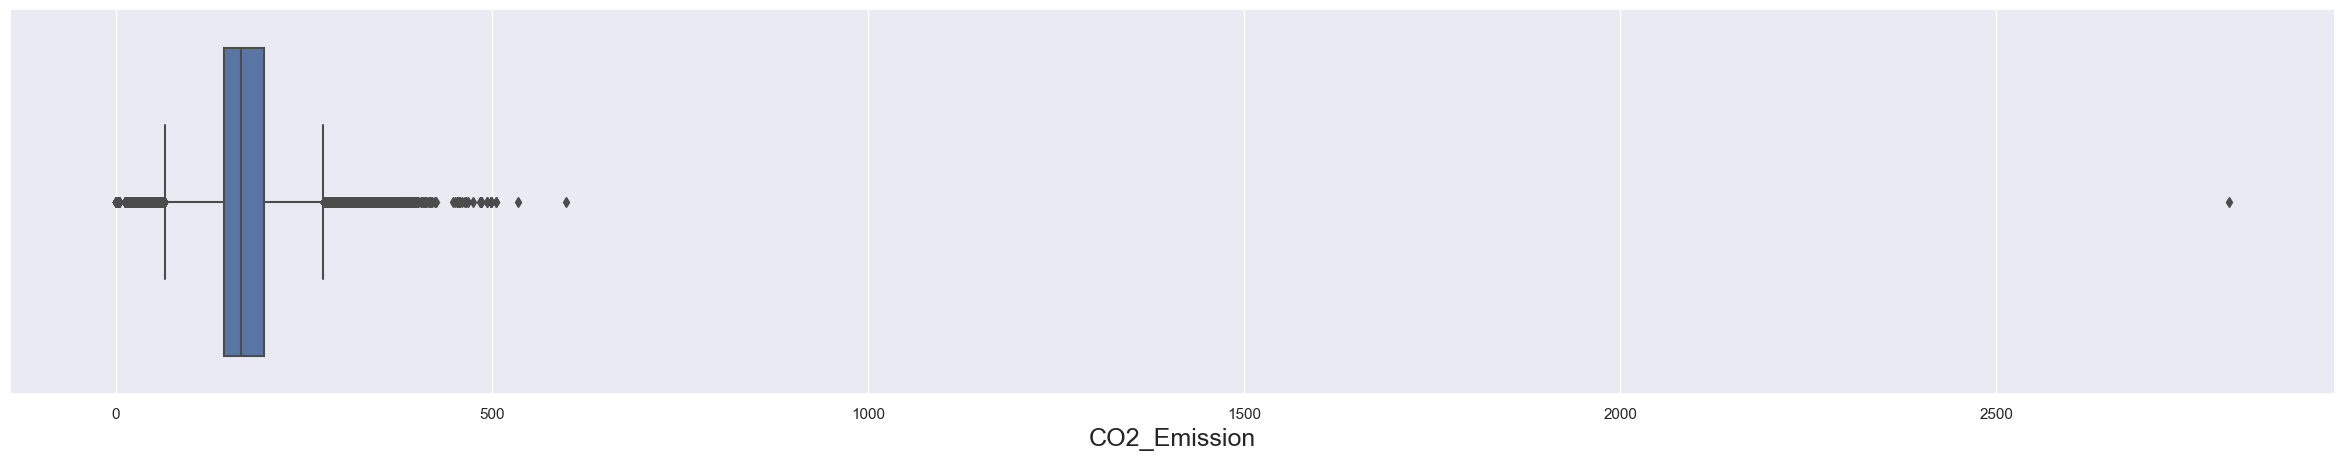

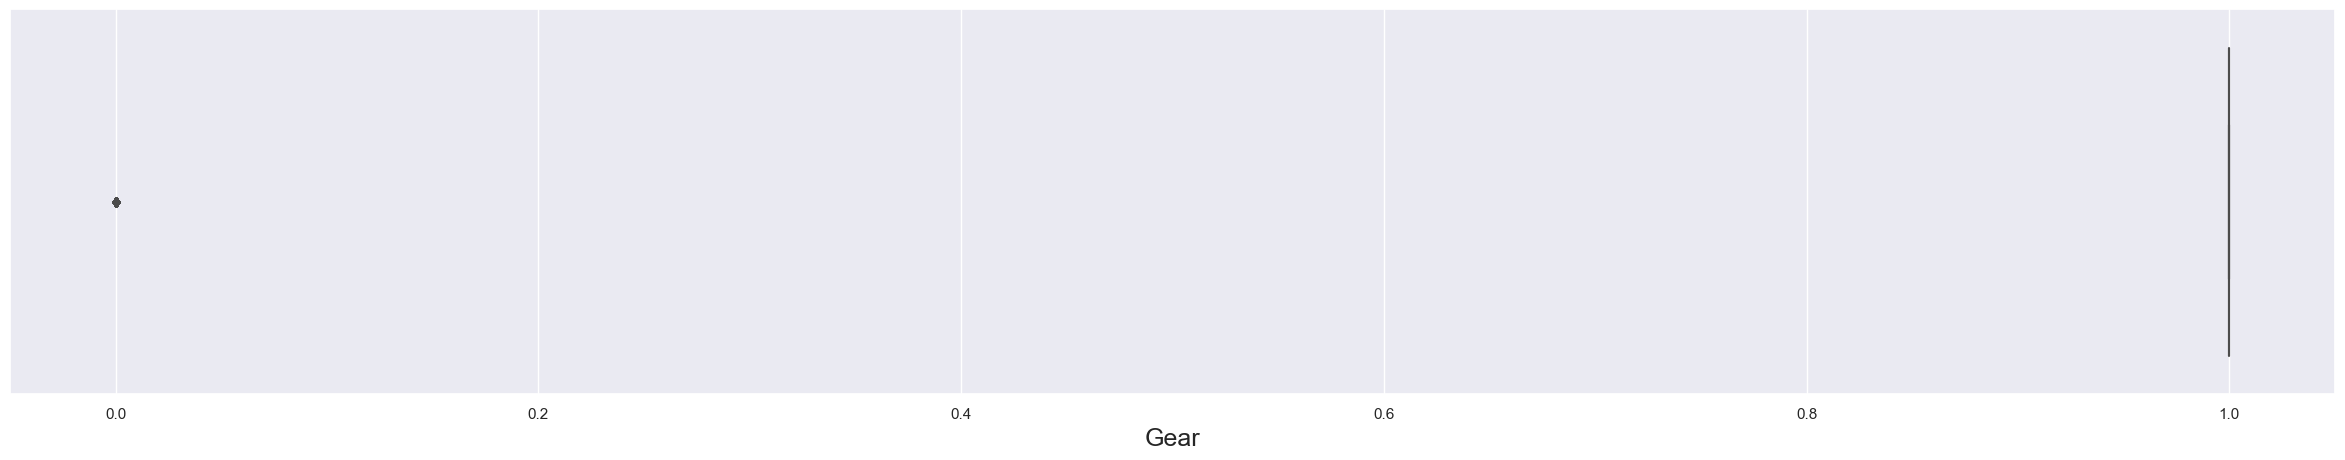

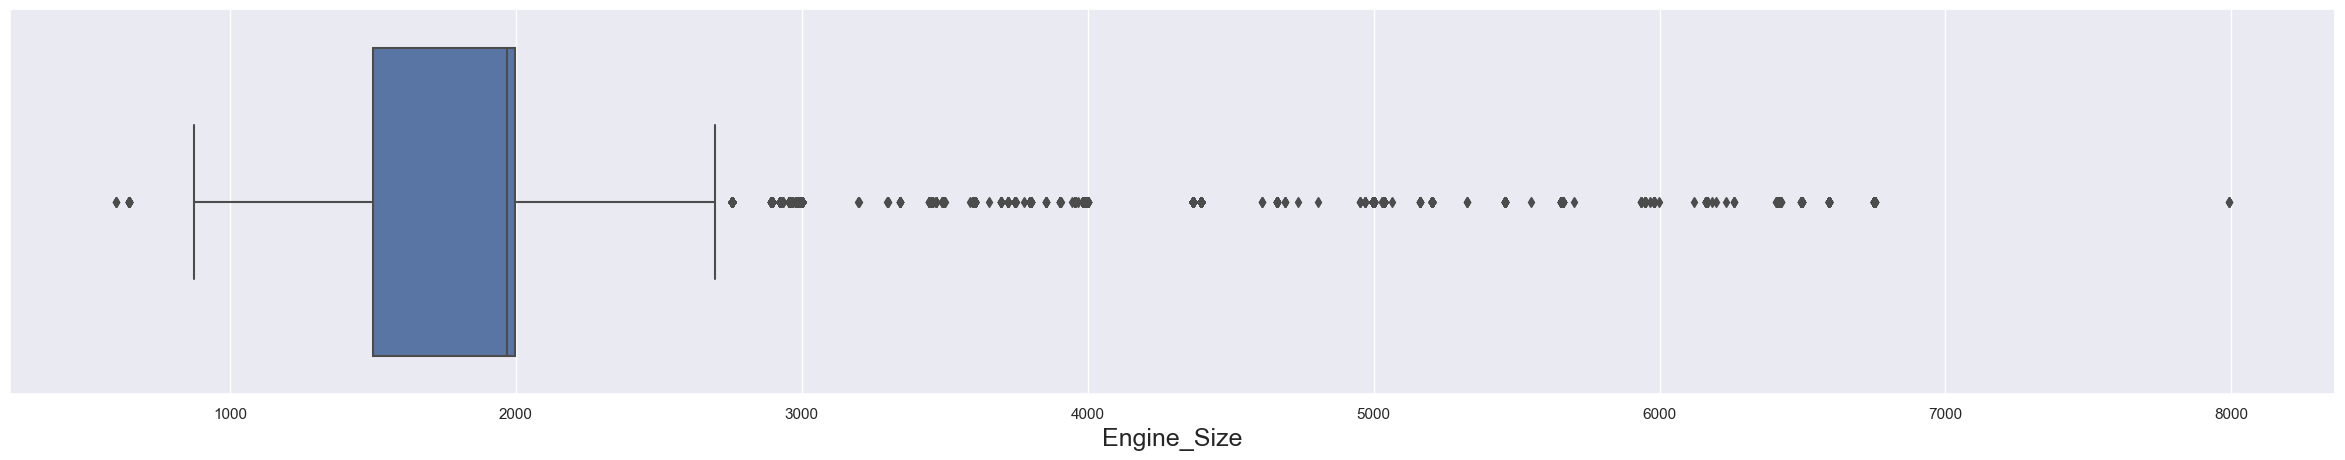

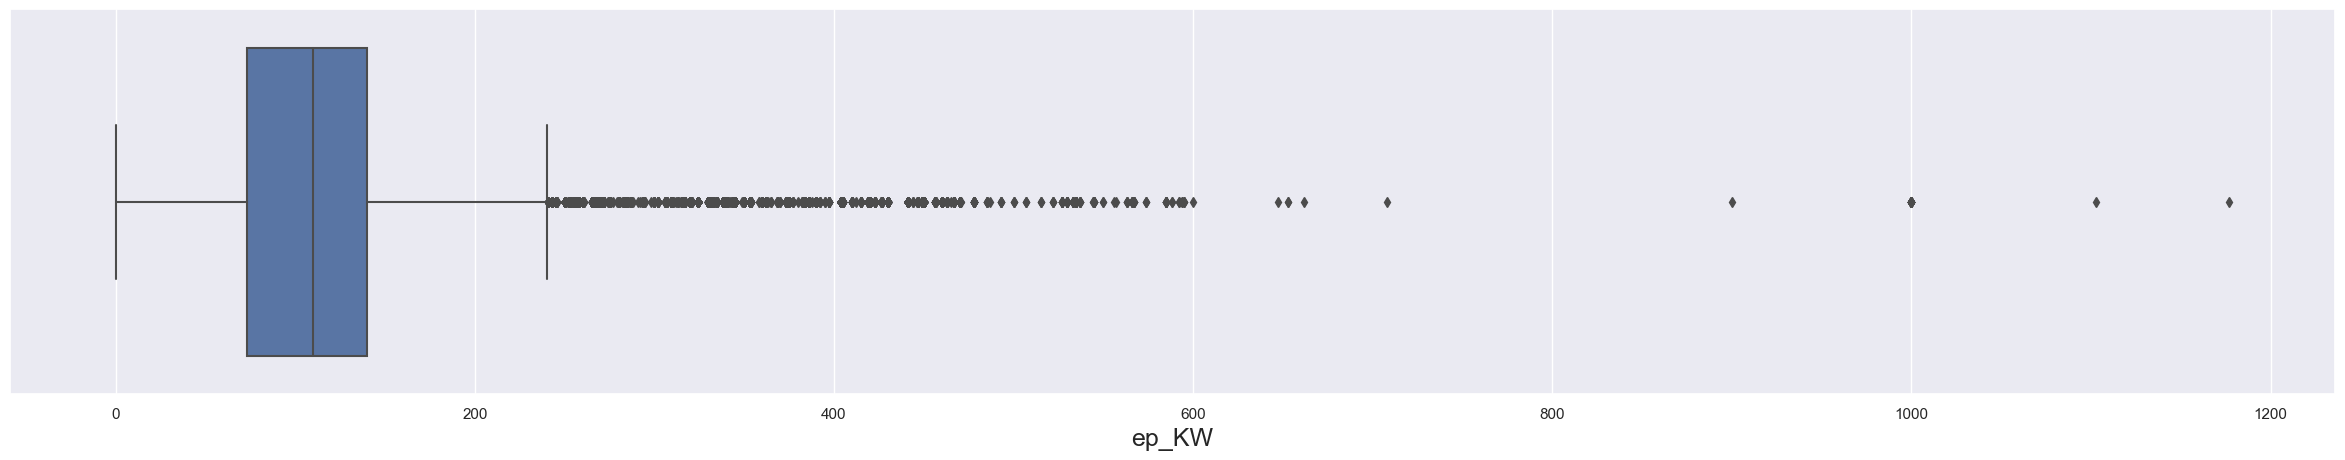

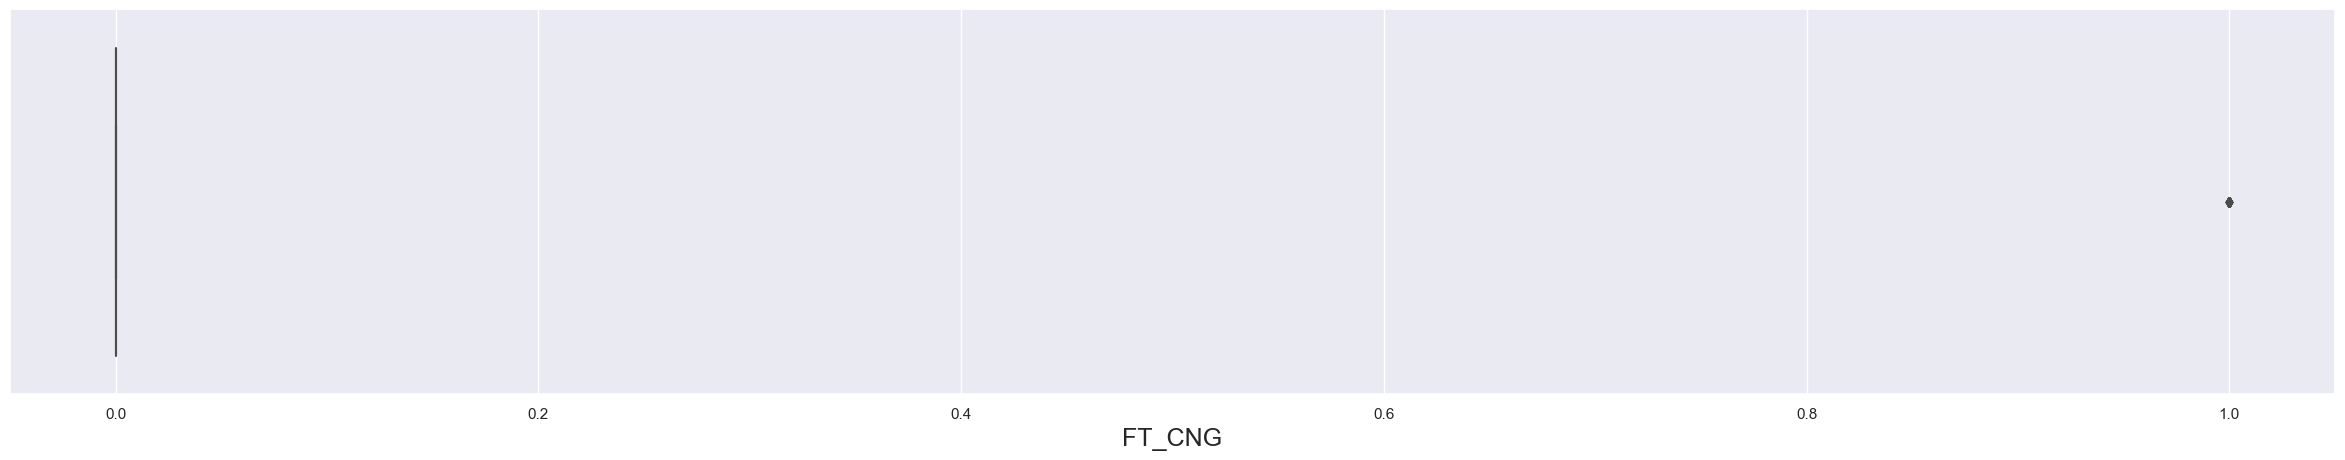

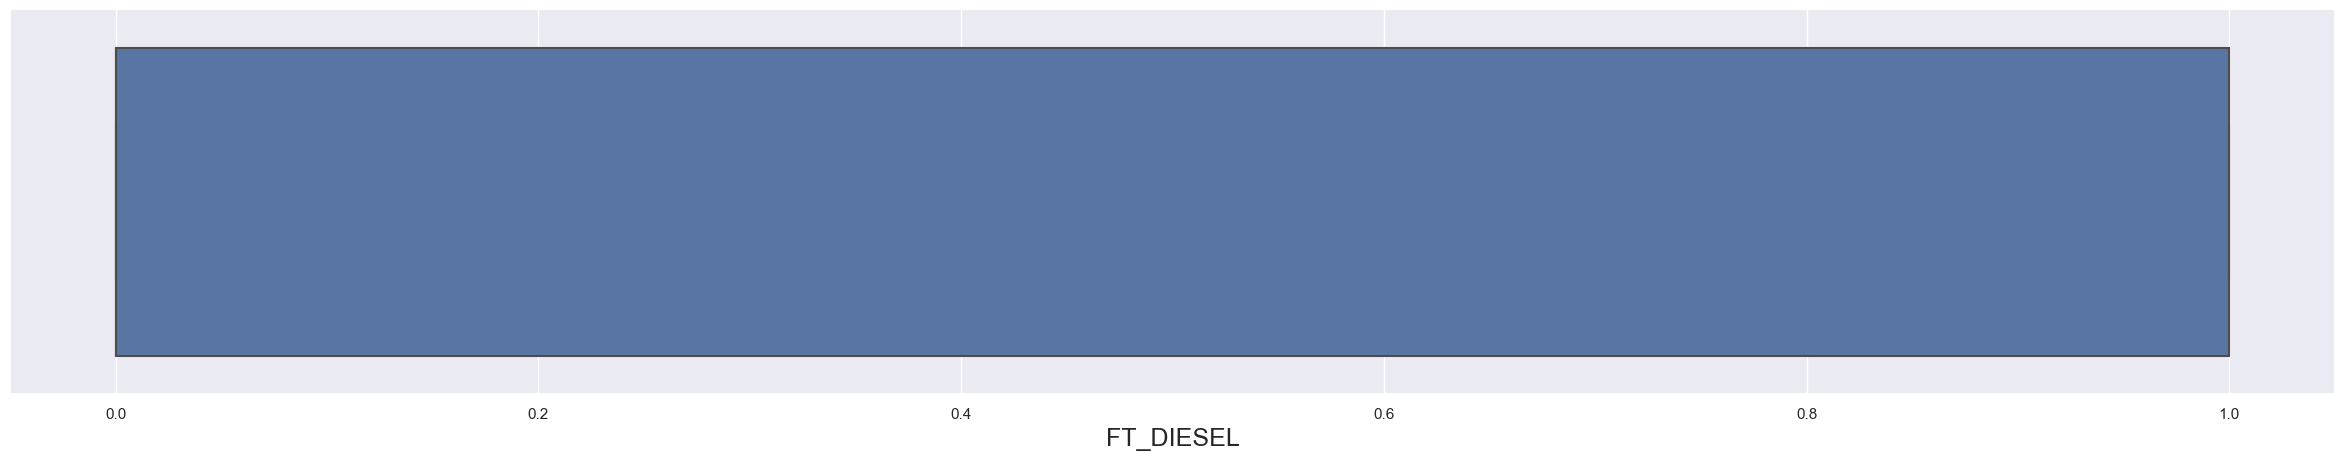

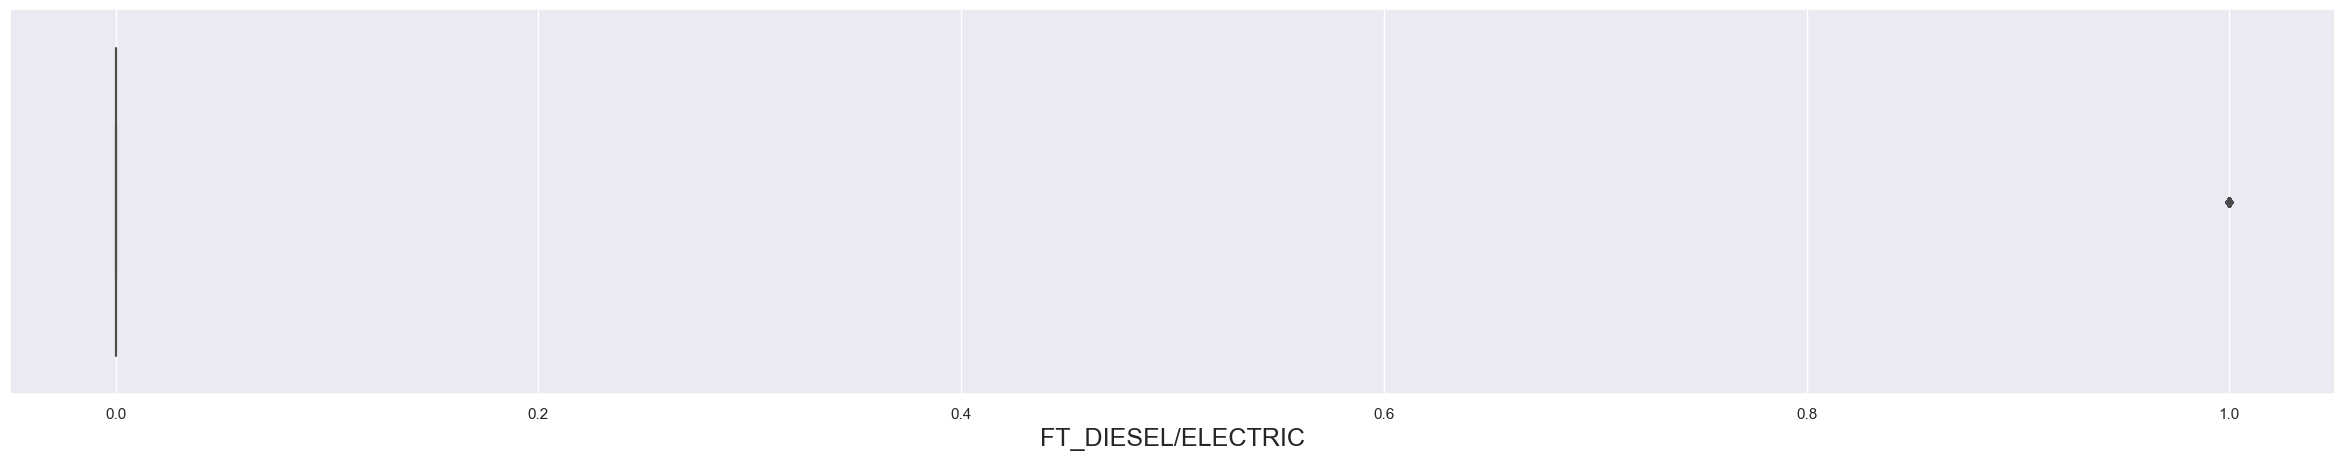

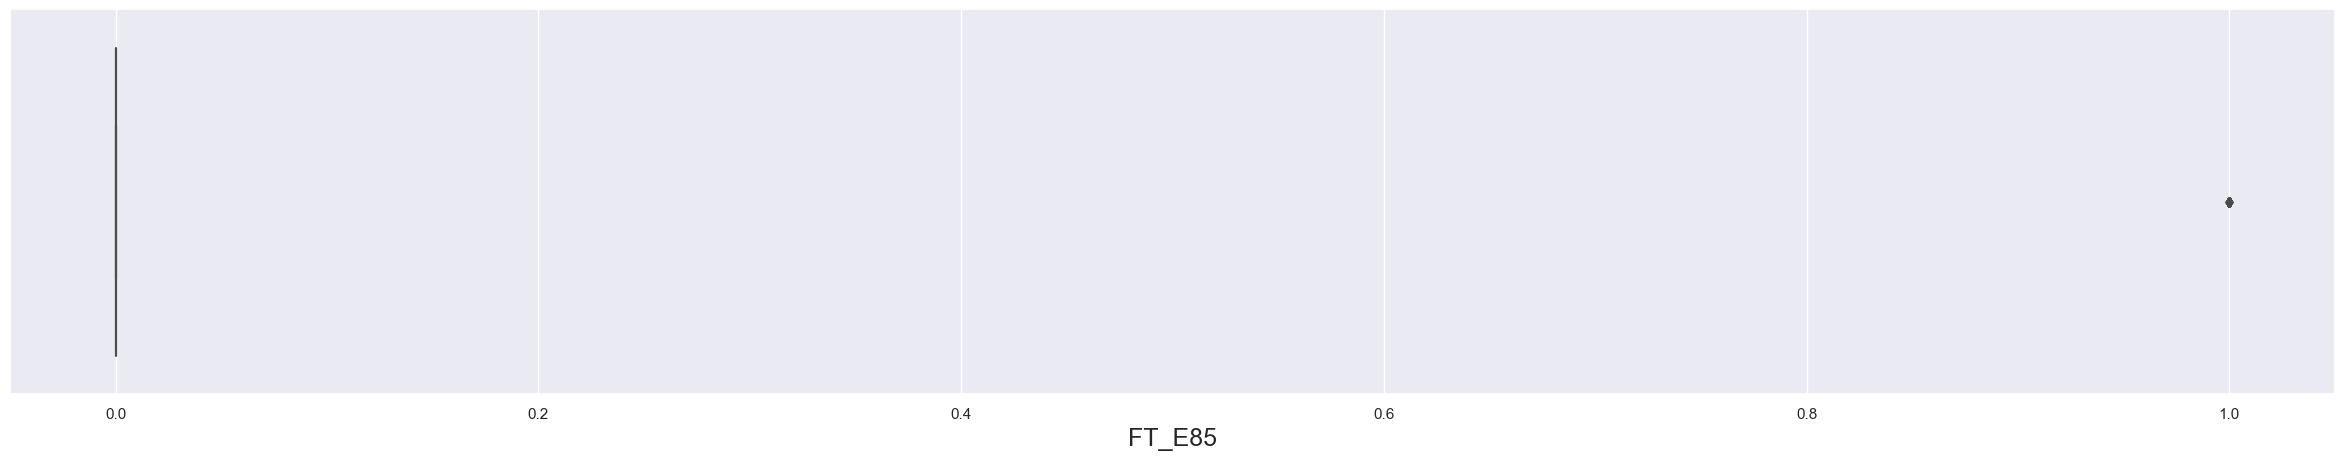

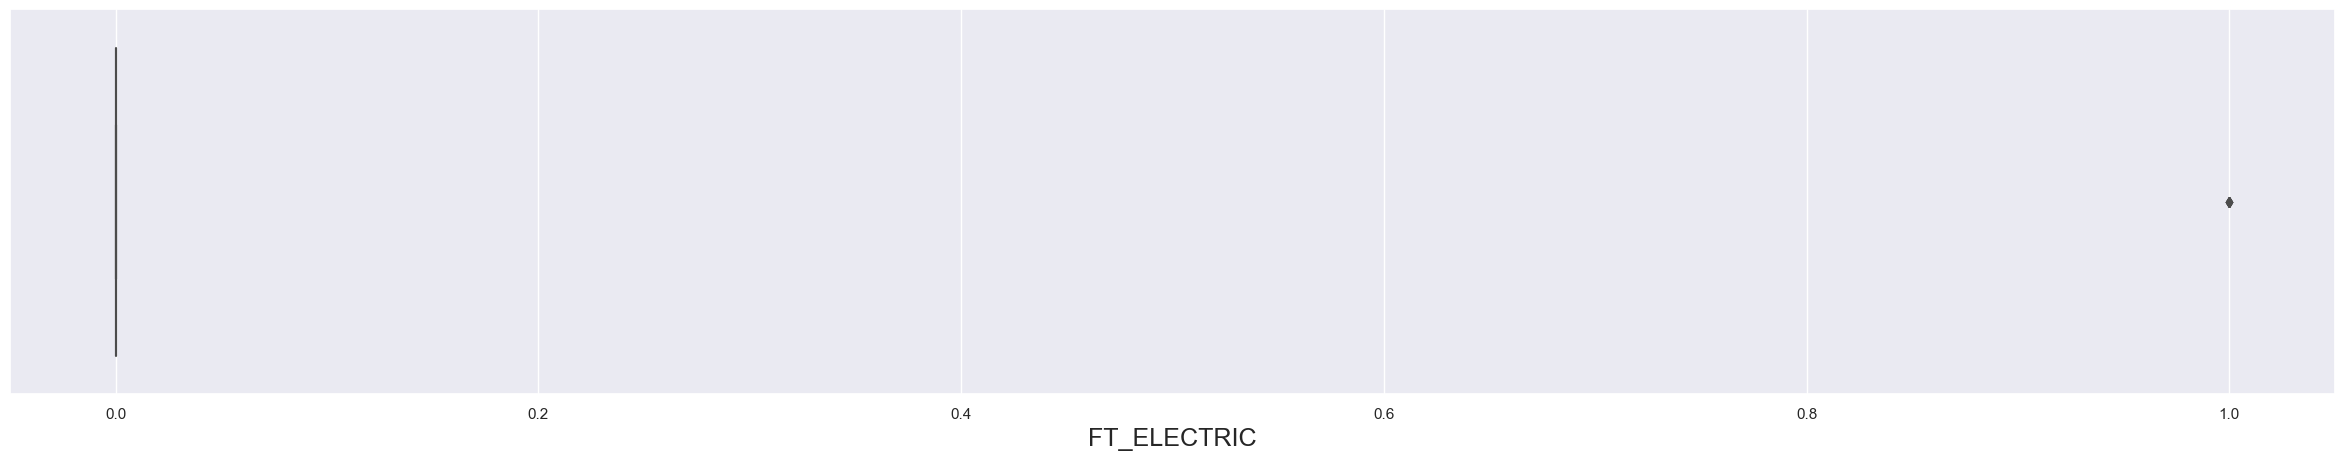

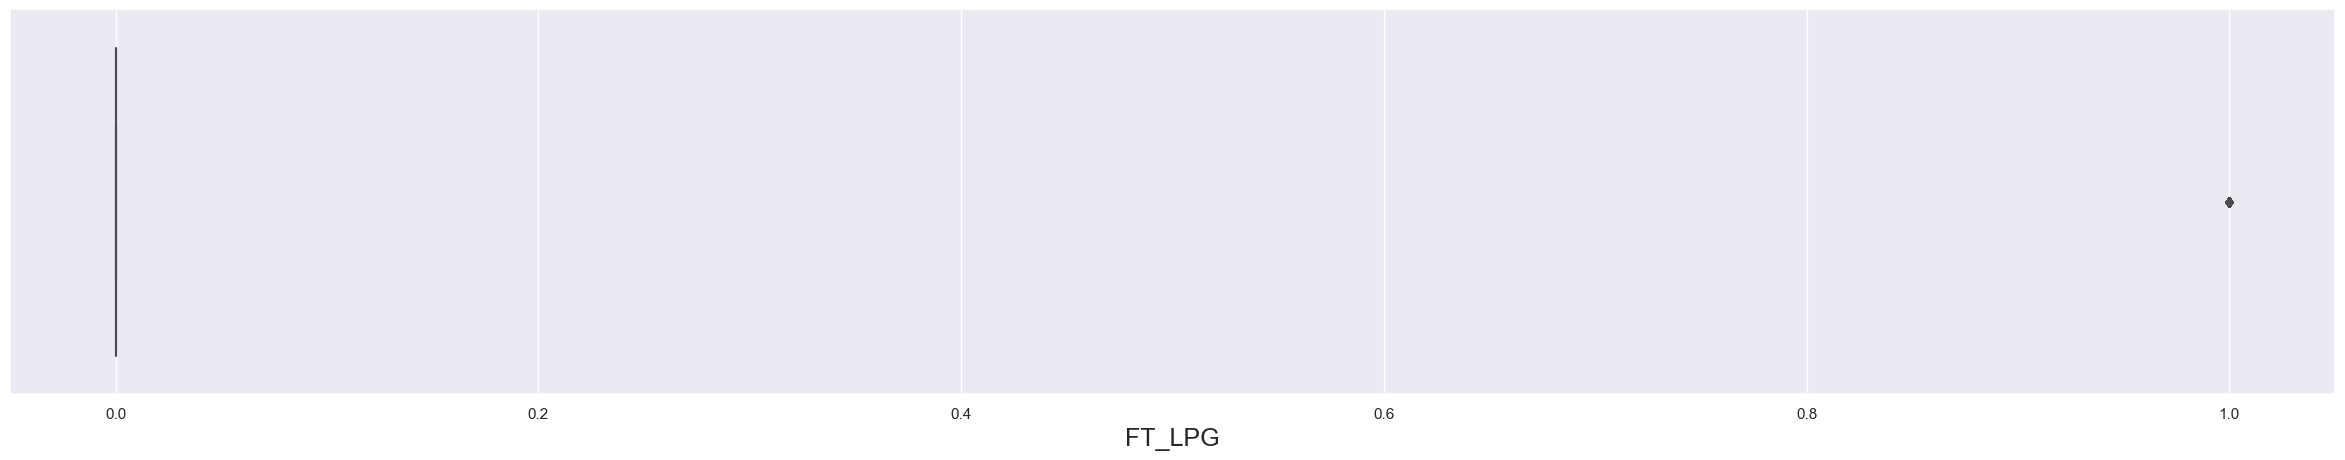

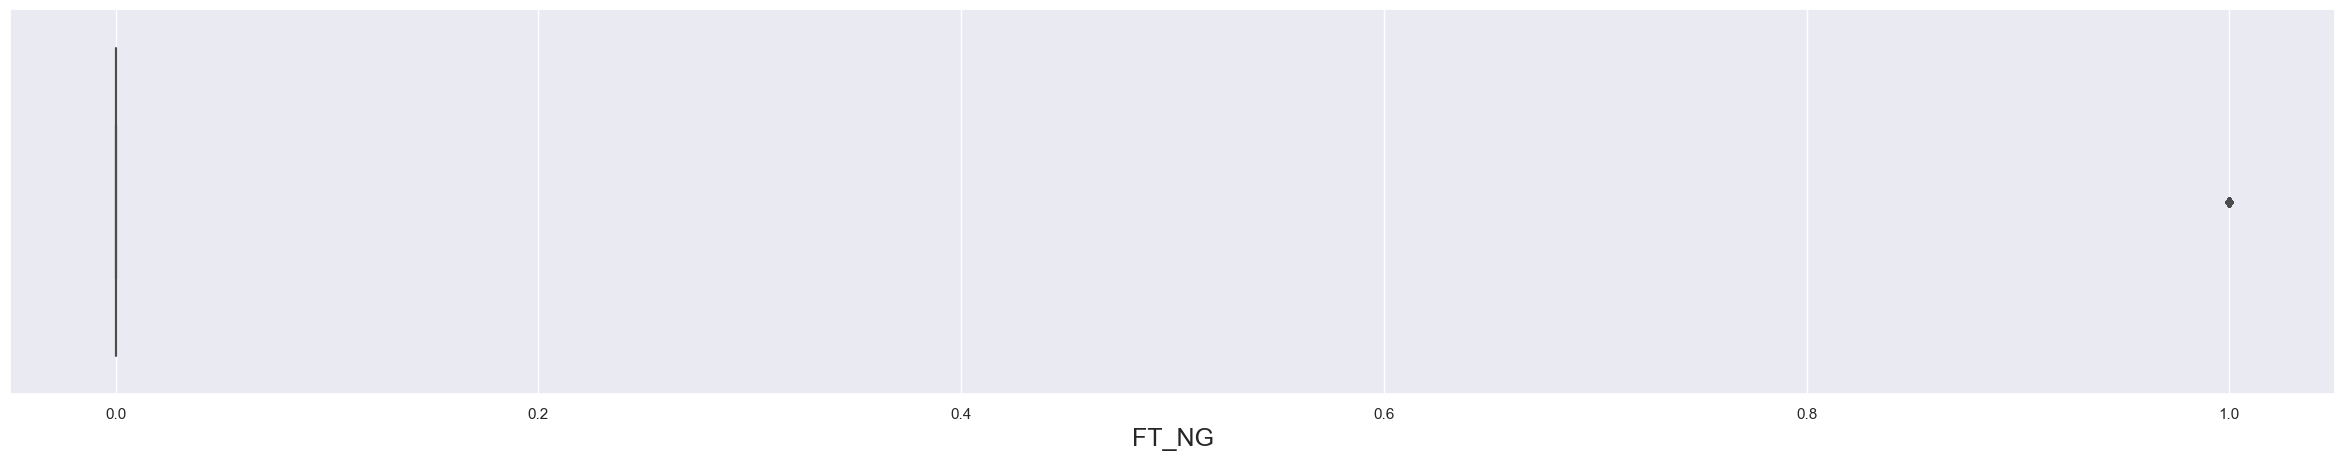

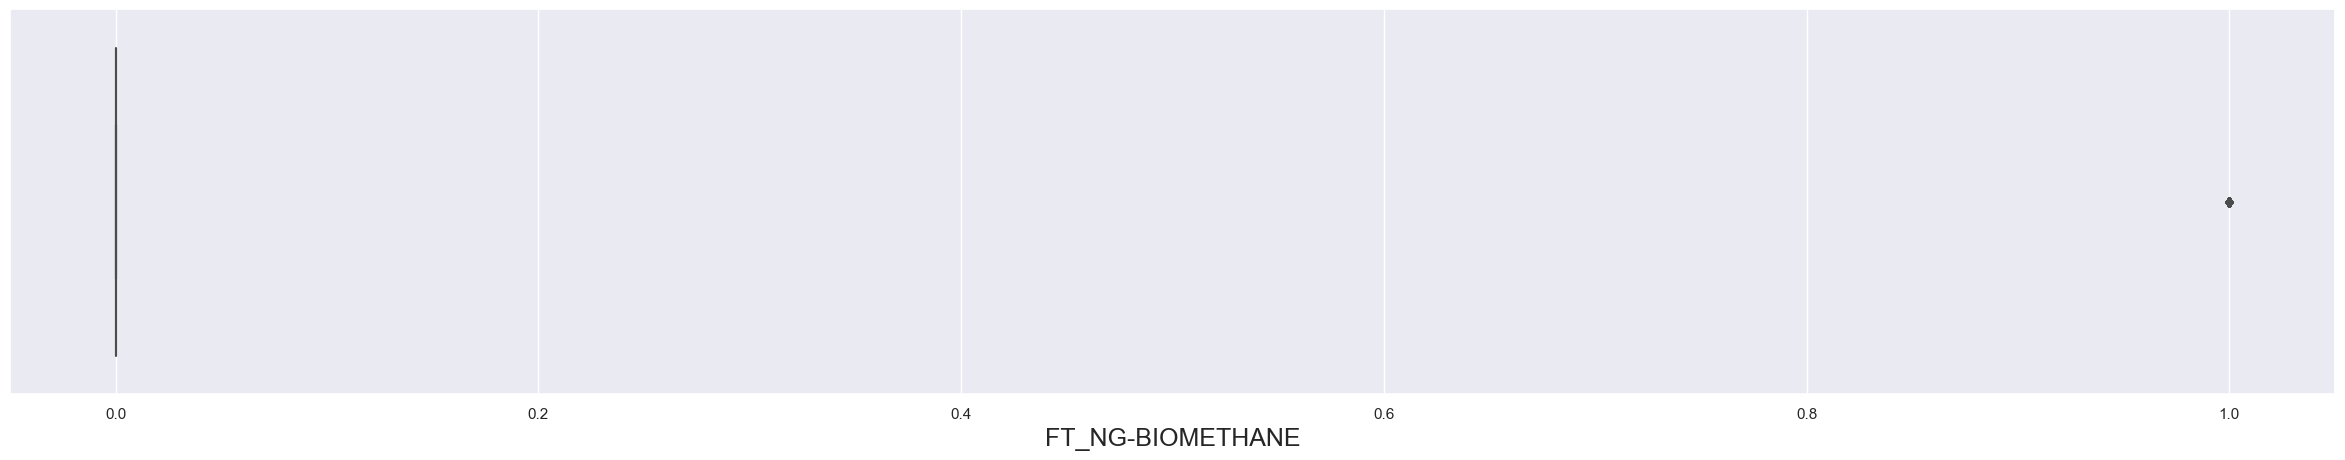

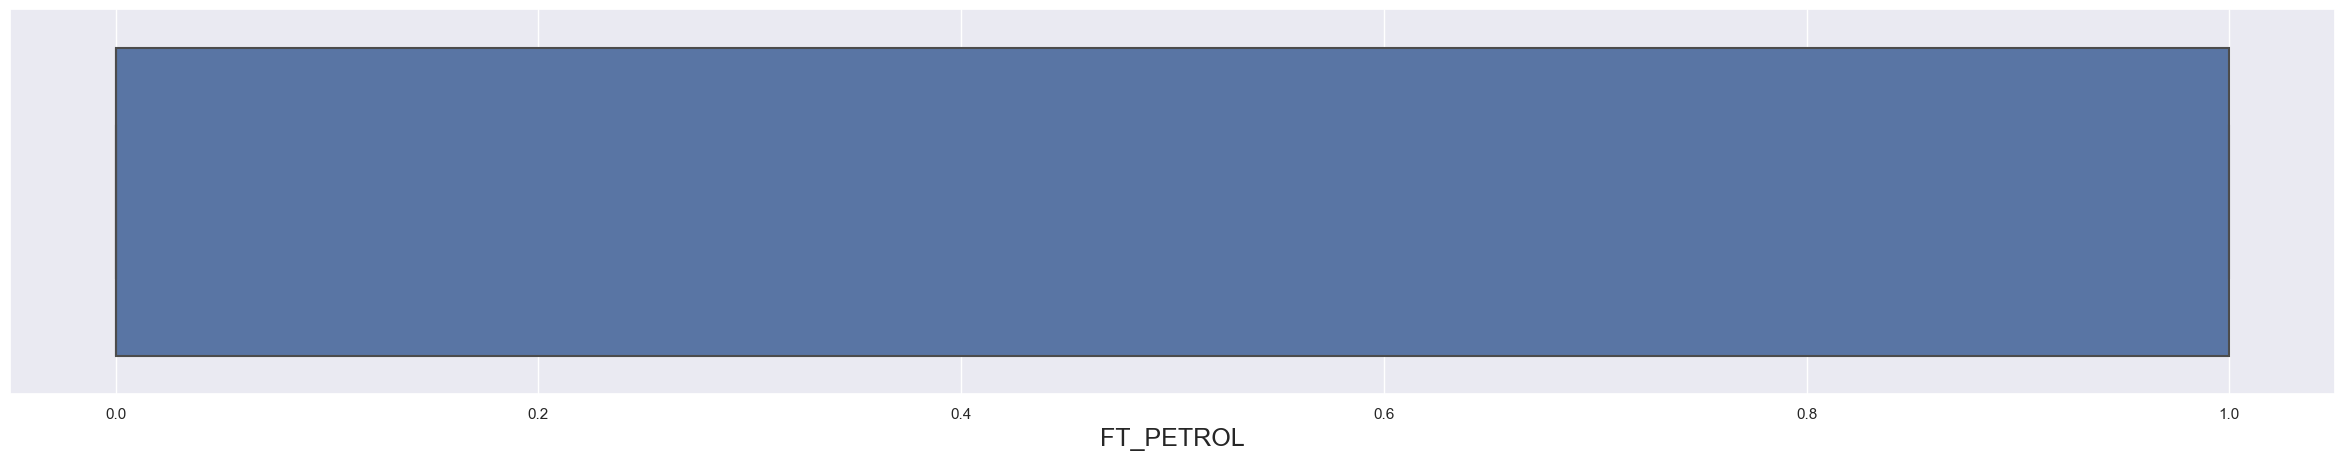

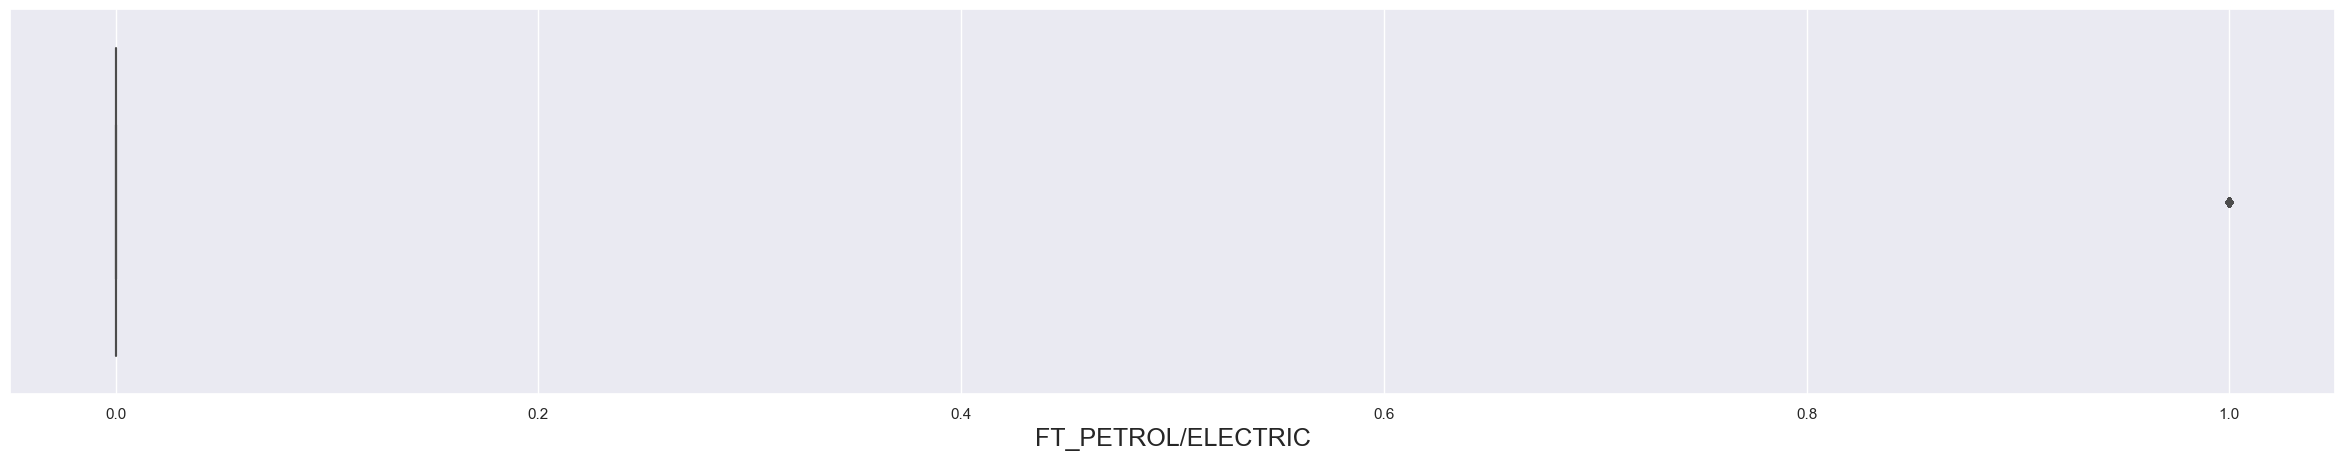

In [38]:
# Visualizing outliers using Boxplots

import seaborn as sns

for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [24]:
import lazypredict

In [18]:
from sklearn.model_selection import train_test_split

# Creating train test split
X=sample_df.drop('CO2_Emission', axis=1)
y=sample_df.CO2_Emission

# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25)

In [48]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:07<00:00,  5.92it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
PoissonRegressor                             0.75       0.82   20.39   
HuberRegressor                               0.73       0.81   21.00   
GradientBoostingRegressor                    0.73       0.81   21.06   
ExtraTreesRegressor                          0.73       0.81   21.15   
SGDRegressor                                 0.73       0.81   21.18   
BayesianRidge                                0.73       0.81   21.24   
RidgeCV                                      0.73       0.81   21.24   
Ridge                                        0.73       0.81   21.24   
OrthogonalMatchingPursuitCV                  0.73       0.81   21.24   
TransformedTargetRegressor                   0.73       0.81   21.24   
LinearRegression                             0.73       0.81   21.24   
Lars                                         0.73       0.81   2

In [40]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)

c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\linear_model\_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


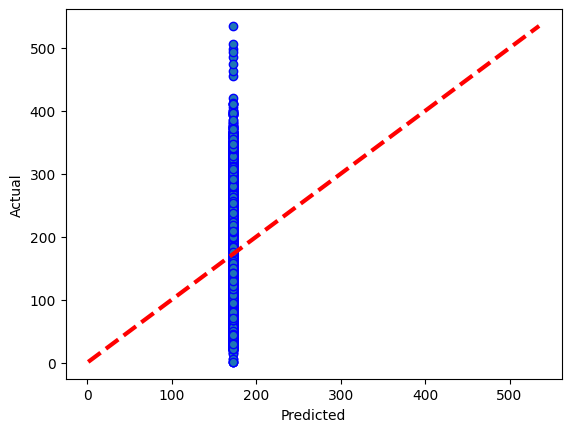

The model performance for testing set
--------------------------------------
MAE is 34.36454388
MSE is 2091.6942842411113
R2 score is -0.00018028681919490808


In [35]:
#Poisson Regression 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

clf = linear_model.PoissonRegressor()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


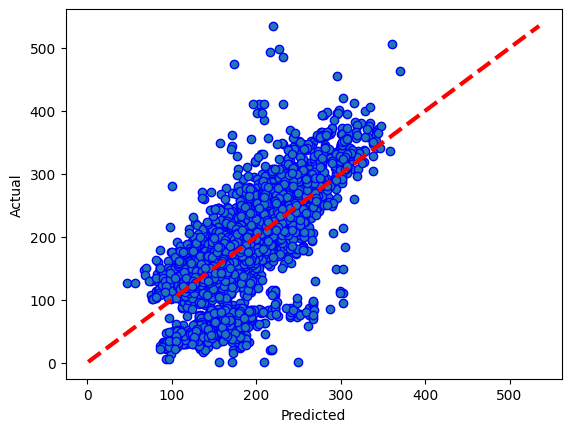

The model performance for testing set
--------------------------------------
MAE is 17.750785888674372
MSE is 741.5902431845348
R2 score is 0.6453956260631415


In [36]:
#Huber Regression 

from sklearn.linear_model import HuberRegressor, LinearRegression

huber = HuberRegressor()
huber.fit(X_train, y_train) 
y_pred = huber.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

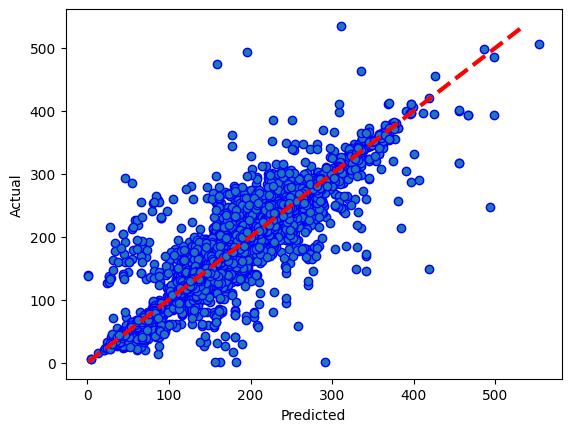

The model performance for testing set
--------------------------------------
MAE is 7.94665553264911
MSE is 253.37162448997367
R2 score is 0.8788459164594554


In [37]:
#Gradient Boosting Regressor 

from sklearn.ensemble import GradientBoostingRegressor 

gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=10000, max_features=15, validation_fraction=0.3)
gbr.fit(X_train, y_train) 
y_pred = gbr.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

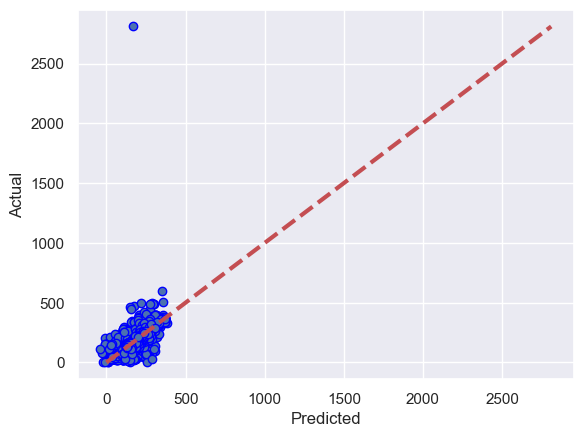

The model performance for testing set
--------------------------------------
MAE is 15.718316378994727
MSE is 786.6441490514984
R2 score is 0.6615842903324294


In [42]:
#Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

linreg = LinearRegression()
linreg.fit(X_train, y_train) 
y_pred = linreg.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
GridSearchCV(estimator=svc(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

y_pred = clf.predict(X_test)  
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


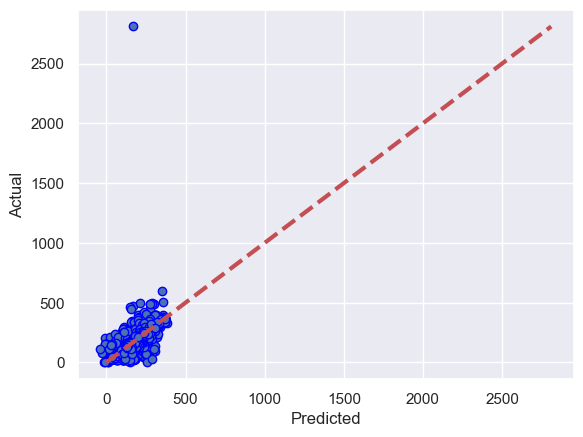

The model performance for testing set
--------------------------------------
MAE is 15.719681005594186
MSE is 786.66135773158
R2 score is 0.6615768871277029


In [43]:
#Lassocv Regression

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=10, random_state=0)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [25]:
# Averages

#Mass_kg	CO2_Emission	Gear	Engine_Size	ep (KW)	

avg_mass=sample_df['Mass_kg'].mean()
avg_emis=sample_df['CO2_Emission'].mean()
avg_gear=sample_df['Gear'].mean()
avg_eng=sample_df['Engine_Size'].mean()
avg_ep=sample_df['ep_KW'].mean()

In [56]:
sample_df['Mass_kg'].mean()

1715.57675

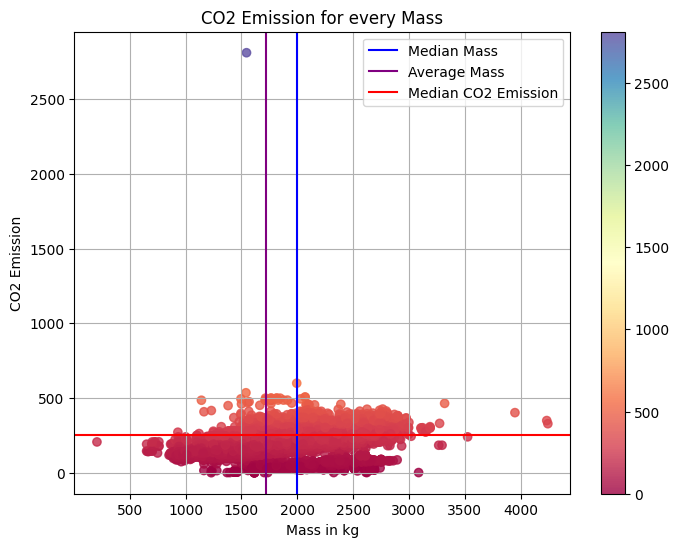

In [33]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(sample_df.Mass_kg, sample_df.CO2_Emission, 
            alpha = 0.8, c = sample_df.CO2_Emission, 
            cmap = "Spectral")

# add annotations and visuals
median_CO2_emission = 250
median_Mass = 2000
average_Mass = sample_df['Mass_kg'].mean()

plt.colorbar(orientation = "vertical")
plt.axvline(median_Mass, color = "Blue", label = "Median Mass")
plt.axvline(average_Mass, color = "Purple", label = "Average Mass")
plt.axhline(median_CO2_emission, color = "Red", label = "Median CO2 Emission")
plt.xlabel("Mass in kg")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission for every Mass")
plt.grid(True)
plt.legend()
plt.show()

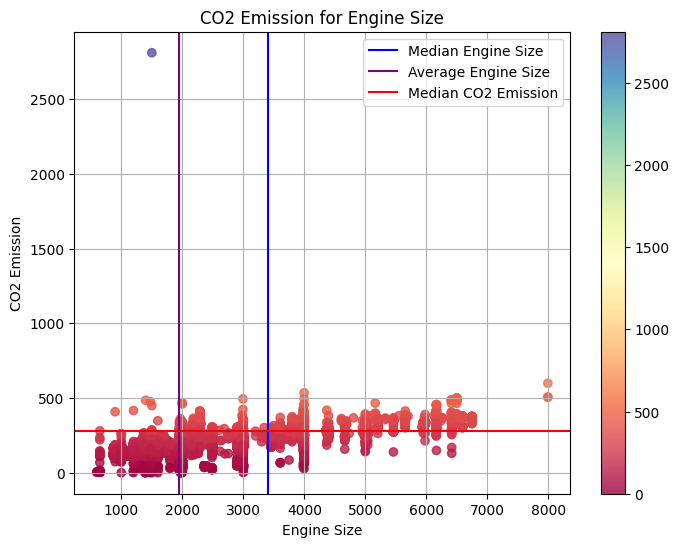

In [34]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(sample_df.Engine_Size, sample_df.CO2_Emission, 
            alpha = 0.8, c = sample_df.CO2_Emission, 
            cmap = "Spectral")

# add annotations and visuals
median_CO2_emission = 280
median_Engine_Size = 3400
average_Engine_Size = sample_df['Engine_Size'].mean()

plt.colorbar(orientation = "vertical")
plt.axvline(median_Engine_Size, color = "Blue", label = "Median Engine Size")
plt.axvline(average_Engine_Size, color = "Purple", label = "Average Engine Size")
plt.axhline(median_CO2_emission, color = "Red", label = "Median CO2 Emission")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission for Engine Size")
plt.grid(True)
plt.legend()
plt.show()

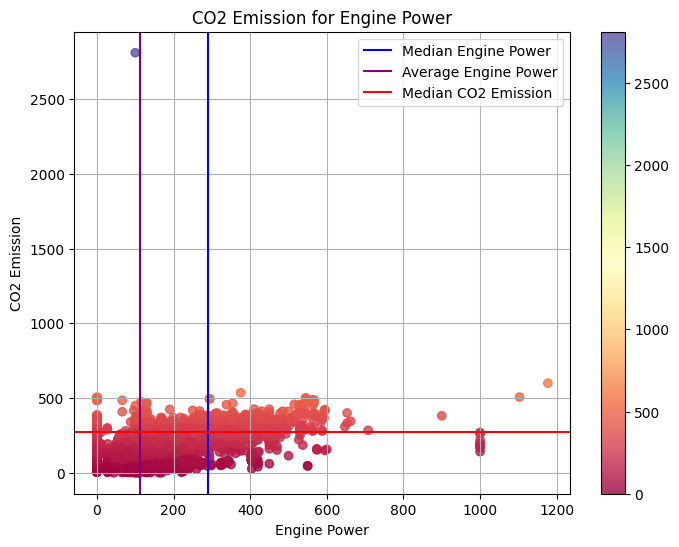

In [35]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(sample_df.ep_KW, sample_df.CO2_Emission, 
            alpha = 0.8, c = sample_df.CO2_Emission, 
            cmap = "Spectral")

# add annotations and visuals
median_CO2_emission = 270
median_Engine_Power = 290
average_Engine_Power = sample_df['ep_KW'].mean()

plt.colorbar(orientation = "vertical")
plt.axvline(median_Engine_Power, color = "Blue", label = "Median Engine Power")
plt.axvline(average_Engine_Power, color = "Purple", label = "Average Engine Power")
plt.axhline(median_CO2_emission, color = "Red", label = "Median CO2 Emission")
plt.xlabel("Engine Power")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission for Engine Power")
plt.grid(True)
plt.legend()
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [28]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, predictions)
print(confusionMatrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
# Accuracy
print(model.score(X_test, y_test))

0.0125


In [30]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         2
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         8
        23.0       0.00      0.00      0.00         5
        24.0       0.00      0.00      0.00         2
        25.0       0.00      0.00      0.00         4
        26.0       0.00      0.00      0.00         7
        27.0       0.00      0.00      0.00        14
        28.0       0.00      0.00      0.00        10
        29.0       0.00      0.00      0.00        11
        30.0       0.00      0.00      0.00        13
        31.0       0.00    

c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [31]:
# AUC and ROC
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [27]:
# CLUSTERING - Transform into a binary classification problem

sample_df = sample_df.astype({"Petrol_CO2": int, "Diesel_CO2": int})

In [22]:
sample_df['Petrol_CO2'] = sample_df.apply(lambda row: row.CO2_Emission if row.FT_PETROL == 1 else '0', axis=1)
sample_df['Diesel_CO2'] = sample_df.apply(lambda row: row.CO2_Emission if row.FT_DIESEL == 1 else '0', axis=1)
sample_df.tail()

,Mass_kg,CO2_Emission,Gear,Engine_Size,ep_KW,FT_CNG,FT_DIESEL,FT_DIESEL/ELECTRIC,FT_E85,FT_ELECTRIC,FT_LPG,FT_NG,FT_NG-BIOMETHANE,FT_PETROL,FT_PETROL/ELECTRIC,Petrol_CO2,Diesel_CO2
2178354,1280.0,150.0,1,1200.0,0.0,0,0,0,0,0,0,0,0,1,0,150.0,0
7216459,1637.0,171.0,1,1997.0,130.0,0,1,0,0,0,0,0,0,0,0,0,171.0
4634464,1156.0,130.0,1,999.0,85.0,0,0,0,0,0,0,0,0,1,0,130.0,0
3437106,1825.0,181.0,1,2993.0,195.0,0,1,0,0,0,0,0,0,0,0,0,181.0
3981568,1736.0,190.0,1,1798.0,165.0,0,0,0,0,0,0,0,0,1,0,190.0,0


In [24]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
sample_df['cluster'] = kmeans.fit_predict(sample_df[['Petrol_CO2', 'Diesel_CO2']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
sample_df['cen_x'] = sample_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
sample_df['cen_y'] = sample_df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
sample_df['c'] = sample_df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

c:\Users\DELL Latitude E5450\Documents\Python Scripts\DS-TUTORIAL\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


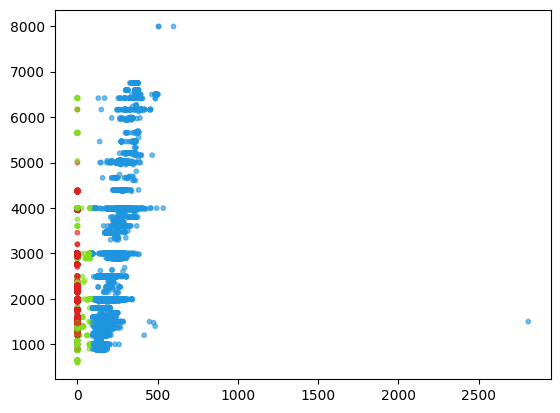

In [25]:
import matplotlib.pyplot as plt
plt.scatter(sample_df.Petrol_CO2, sample_df.Engine_Size, c=sample_df.c, alpha = 0.6, s=10)

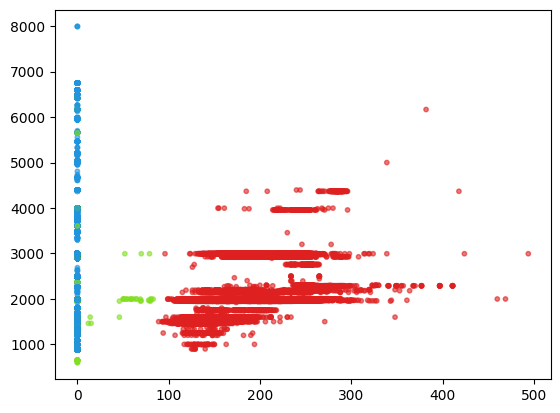

In [28]:
import matplotlib.pyplot as plt
plt.scatter(sample_df.Diesel_CO2, sample_df.Engine_Size, c=sample_df.c, alpha = 0.6, s=10)

Text(0, 0.5, 'Engine_Size')

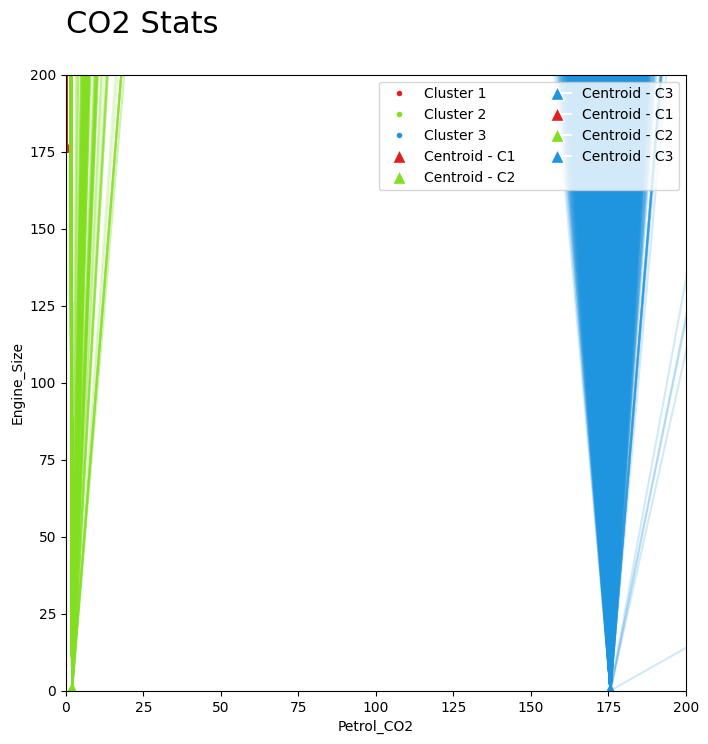

In [29]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(sample_df.Petrol_CO2, sample_df.Engine_Size, c=sample_df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in sample_df.iterrows():
    x = [val.Petrol_CO2, val.cen_x,]
    y = [val.Engine_Size, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)

cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('CO2 Stats\n', loc='left', fontsize=22)
plt.xlabel('Petrol_CO2')
plt.ylabel('Engine_Size')

In [19]:
# Outputs of classification problem

y_class = np.where (y > 200, 1, 0)

# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y_class, random_state=42, test_size=0.25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Accuracy score: 0.9051333333333333
Precision score: 0.8353618421052632
Recall score: 0.7335355285961872


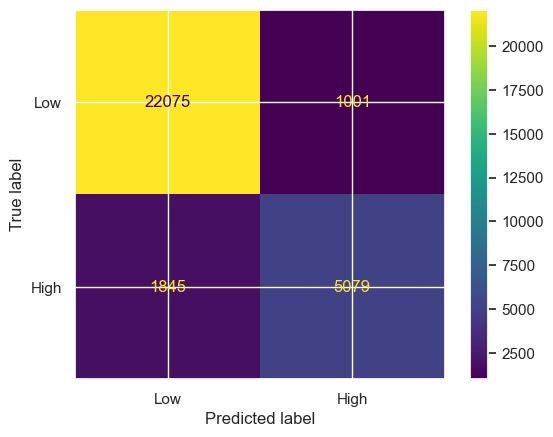

The model performance for testing set
--------------------------------------
Accuracy score: 0.9051333333333333
Precision score: 0.8353618421052632
Recall score: 0.7335355285961872


In [21]:
#We train a logistic regression model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [49]:
# Get the coefficients of each feature
coefficients = pd.Series(logreg.coef_[0], index=X.columns)

# Print the important features (i.e., features with largest coefficients)
print(coefficients.abs().sort_values(ascending=False))

Mass_kg               3.188287
FT_PETROL/ELECTRIC    0.917764
FT_PETROL             0.731731
Gear                  0.730944
Engine_Size           0.721618
FT_DIESEL             0.462021
FT_LPG                0.281252
FT_DIESEL/ELECTRIC    0.218170
FT_CNG                0.125819
FT_E85                0.112048
FT_NG-BIOMETHANE      0.095825
ep_KW                 0.095654
FT_ELECTRIC           0.042660
FT_NG                 0.011503
dtype: float64


In [50]:
# Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

rfclf = RandomForestClassifier()
rfclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rfclf.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Accuracy score: 0.9548666666666666
Precision score: 0.9113737075332349
Recall score: 0.8911034084344309


In [ ]:
# Since the dataset is relatively small, we could try different models and compare their performance to choose the best one. 
# However, some common classification models that are worth considering for your dataset are:
# - Random Forest
# - Gradient Boosting
# - Support Vector Machines

# Random Forest and Gradient Boosting are ensemble methods that combine multiple decision trees to improve the model's performance. 
# Random Forest builds multiple decision trees and combines their predictions by taking the average, while Gradient Boosting builds decision trees sequentially, 
# where each subsequent tree tries to correct the errors of the previous tree.

# Support Vector Machines (SVM) are another popular classification algorithm that tries to find the best hyperplane that separates the classes. 
# SVM can also handle non-linear decision boundaries by transforming the features to a higher-dimensional space.

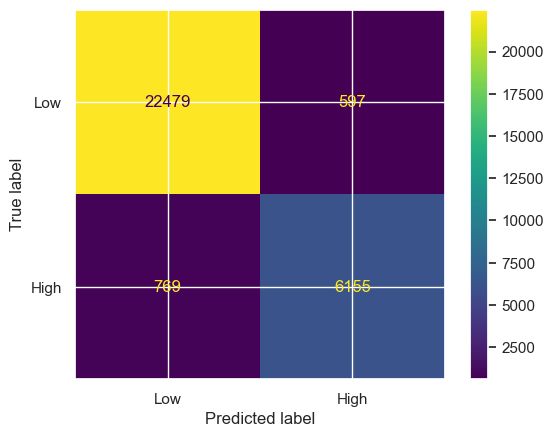

The model performance for testing set
--------------------------------------
Accuracy score: 0.9544666666666667
Precision score: 0.9115817535545023
Recall score: 0.8889370306181398


In [22]:
#We train a Random Forest model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Random Forest Classifier model
rfclf = RandomForestClassifier()
rfclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rfclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [51]:
# Get the coefficients of each feature
coefficients = pd.Series(rfclf.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False)) 

Mass_kg               0.554579
Engine_Size           0.209030
ep_KW                 0.154498
Gear                  0.022297
FT_PETROL             0.020385
FT_PETROL/ELECTRIC    0.019242
FT_DIESEL             0.018424
FT_DIESEL/ELECTRIC    0.000783
FT_LPG                0.000367
FT_NG-BIOMETHANE      0.000181
FT_NG                 0.000106
FT_E85                0.000091
FT_CNG                0.000011
FT_ELECTRIC           0.000006
dtype: float64


In [52]:
# Gradient Boosting model 

# Train a Gradient Boosting Classifier model
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = gbclf.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Accuracy score: 0.9287333333333333
Precision score: 0.8644532439841608
Recall score: 0.8197573656845754


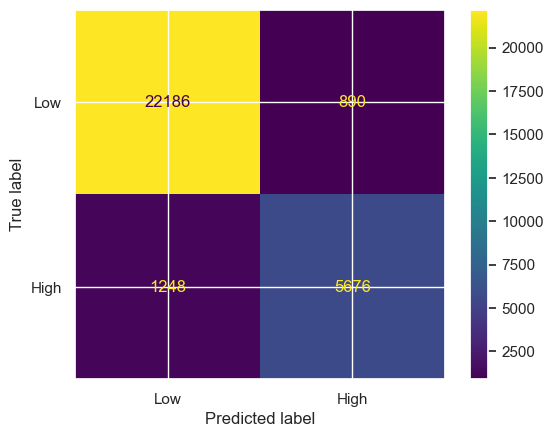

The model performance for testing set
--------------------------------------
Accuracy score: 0.9287333333333333
Precision score: 0.8644532439841608
Recall score: 0.8197573656845754


In [23]:
#We train a Gradient Boosting model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Gradient Boosting Classifier model
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = gbclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [53]:
# Get the coefficients of each feature
coefficients = pd.Series(gbclf.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False)) 

Mass_kg               0.644725
Engine_Size           0.107507
ep_KW                 0.078439
FT_PETROL             0.073497
FT_PETROL/ELECTRIC    0.059789
Gear                  0.032905
FT_DIESEL/ELECTRIC    0.001646
FT_DIESEL             0.001493
dtype: float64


In [55]:
# Support Vector Machines model  

# Train a Support Vector Machines model
from sklearn import svm

svmclf = svm.SVC()
svmclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svmclf.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Accuracy score: 0.9191
Precision score: 0.85007006071929
Recall score: 0.7885615251299827


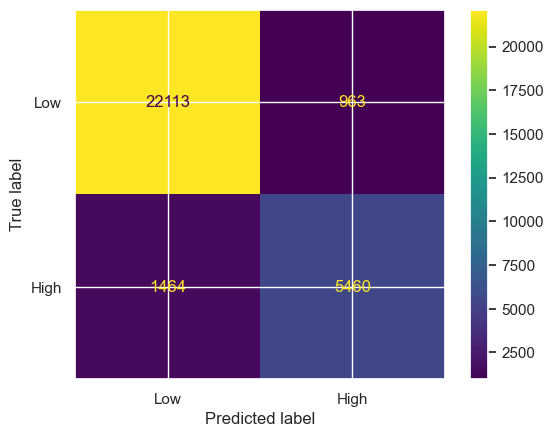

The model performance for testing set
--------------------------------------
Accuracy score: 0.9191
Precision score: 0.85007006071929
Recall score: 0.7885615251299827


In [24]:
#We train a Support Vector Machines model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Support Vector Machines model
svmclf = svm.SVC()
svmclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svmclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [56]:
# Get the coefficients of each feature
coefficients = pd.Series(gbclf.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False)) 

Mass_kg               0.644725
Engine_Size           0.107507
ep_KW                 0.078439
FT_PETROL             0.073497
FT_PETROL/ELECTRIC    0.059789
Gear                  0.032905
FT_DIESEL/ELECTRIC    0.001646
FT_DIESEL             0.001493
dtype: float64
